In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from NN_module.neural_network import NN
from NN_module.layers import Dense

## Regression
to test the regression capabilities of this neural network we will fit a NN into a sine plot

In [3]:
sin_x = np.array(np.linspace(0,12.28,10000,dtype=float),ndmin=2).T
sin_y = np.array(np.sin(sin_x),ndmin=2)

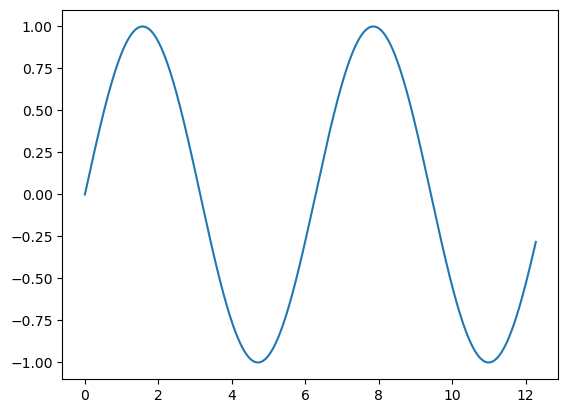

In [4]:
plt.plot(sin_x, sin_y)
plt.show()

In order to fit this data of cosine we will implement the neural network with the loss function of mse 'Mean squared error'.

In [5]:
model_sin_reg = NN([ Dense(units = 128 ,activation = 'relu'), 
                    Dense(units = 128, activation = 'relu'),
                    Dense(units = 1, activation = 'linear')],
                   loss = 'mean_squared_error',)

In [6]:
model_sin_reg.fit(sin_x,sin_y, epochs=3000, optimizer='adam', learning_rate=0.001, decay=0.0001,momentum=0, get_log=True)

epoch: 0loss: 0.511

epoch: 800loss: 0.349

epoch: 1600loss: 0.089

epoch: 2400loss: 0.034

epoch: 3200loss: 0.021

epoch: 4000loss: 0.007



KeyboardInterrupt: 

In [7]:
sin_y_predict = model_sin_reg.predict(sin_x)
print(sin_y_predict[:10,])

[[-4.94626970e-03]
 [-3.73449306e-03]
 [-2.52271643e-03]
 [-1.31093979e-03]
 [-9.91631582e-05]
 [ 1.11261348e-03]
 [ 2.32439011e-03]
 [ 3.53616675e-03]
 [ 4.74794338e-03]
 [ 5.95972002e-03]]


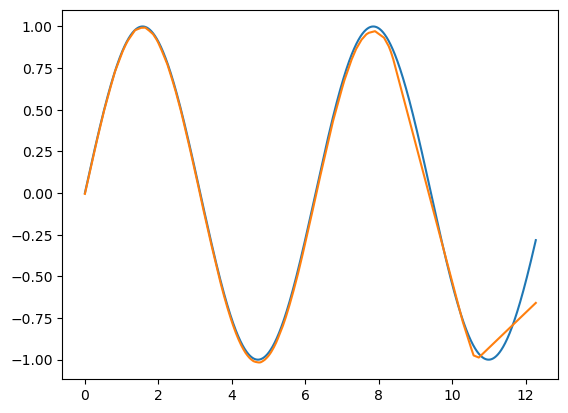

In [8]:
plt.plot(sin_x, sin_y)
plt.plot(sin_x, sin_y_predict)
plt.show()

The curve fits quite well , the adam optimizer converges really fast making the learning process very fast.

## Classification
we will be testing the nueral network for classification purposes.

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("./test_data/spiral.csv")
df.head()

,X,Y,Group
0,31.15,7.30,3
1,30.45,6.65,3
2,29.70,6.00,3
3,28.90,5.55,3
4,28.05,5.00,3


In [11]:
#creating one hot vector for the classification
df.insert(3 , "cat1" ,0)
df.insert(4 , "cat2" , 0)
df.insert(5 , "cat3" , 0)
df['cat1'] = np.where(df['Group'] == 1, 1, df['cat1'])
df['cat2'] = np.where(df['Group'] == 2, 1, df['cat2'])
df['cat3'] = np.where(df['Group'] == 3, 1, df['cat3'])
df.tail()

,X,Y,Group,cat1,cat2,cat3
306,15.75,13.85,2,0,1,0
307,15.65,14.05,2,0,1,0
308,15.65,14.25,2,0,1,0
309,15.65,14.50,2,0,1,0
310,15.65,14.60,2,0,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

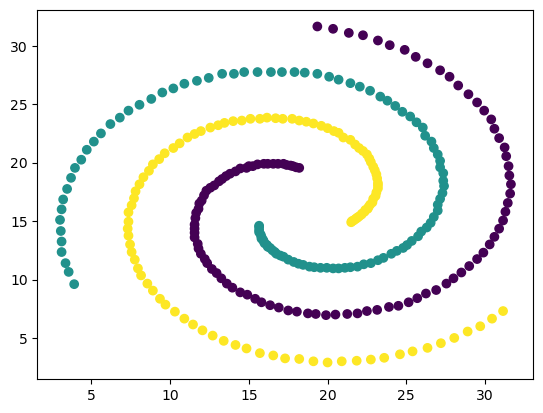

In [12]:
data = df.to_numpy()
plt.scatter(x=data[:,0] , y=data[:,1] , c=data[:,2]);
plt.show

In [38]:
X_spiral = data[:,0:2]
Y_spiral = data[:,3:6]
print("X dimensions :- " ,X.shape)
print("Y dimensions :- " ,Y.shape)

X dimensions :-  (311, 2)
Y dimensions :-  (311, 3)


In [52]:
#creating model
model_spiral = NN([ Dense(units = 128 ,activation = 'relu'),
                    Dense(units = 128, activation = 'relu'),
                    Dense(units = 3, activation = 'softmax')],
                    loss = 'categorical_crossentropy',)

In [53]:
model_spiral.fit(X,Y, epochs=3000, optimizer='adam', learning_rate=0.001, decay=0.0001,momentum=0, get_log=True)

epoch: 0loss: 1.099

epoch: 300loss: 0.687

epoch: 600loss: 0.573

epoch: 900loss: 0.343

epoch: 1200loss: 0.154

epoch: 1500loss: 0.046

epoch: 1800loss: 0.011

epoch: 2100loss: 0.002

epoch: 2400loss: 0.000

epoch: 2700loss: 0.000



In [42]:
#testing the model
#let's create an array containing all points in the range of (0,0) to (35,35)
x_coords = np.arange(0, 40, 0.5)
y_coords = np.arange(0, 40, 0.5)

# creating all combinations
xv, yv = np.meshgrid(x_coords, y_coords)
    
# Stack and transpose
X_spiral_test = np.stack((xv, yv), axis=-1).reshape(-1, 2)

print(X_spiral_test.shape)

(6400, 2)


In [54]:
Y_spiral_test = model_spiral.predict(X_spiral_test)
print(Y_spiral_test.shape)
print(Y_spiral_test[:10,:])

(6400, 3)
[[1.17069660e-33 1.01675173e-16 1.00000000e+00]
 [9.19377359e-36 3.31952277e-25 1.00000000e+00]
 [2.24204116e-37 4.54114611e-32 1.00000000e+00]
 [9.42101056e-39 4.58093689e-38 1.00000000e+00]
 [8.50137625e-40 7.69021701e-43 1.00000000e+00]
 [6.09837345e-41 1.15538023e-47 1.00000000e+00]
 [1.34199449e-42 1.09733185e-52 1.00000000e+00]
 [3.77461516e-44 1.38359517e-57 1.00000000e+00]
 [1.25770340e-45 1.81916129e-62 1.00000000e+00]
 [4.98847021e-47 2.55095987e-67 1.00000000e+00]]


In [55]:
Y_spiral_predict = np.argmax(Y_spiral_test , axis = 1)
Y_spiral_predict += 1 # as original mappint is {1,2,3}
Y_spiral_predict[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

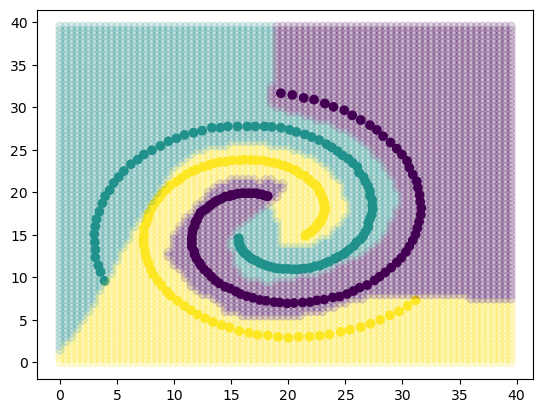

In [56]:
plt.scatter(x=data[:,0] , y=data[:,1] , c=data[:,2]);
plt.scatter(X_spiral_test[:,0] , X_spiral_test[:,1] , c = Y_spiral_predict , alpha = 0.15)
plt.show()

therefore as it can be seen the neural network is doing a nice job in a classification problem.